<a href="https://colab.research.google.com/github/hanseul1215/ESAA_study/blob/master/0530_mnist_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [2]:
# 패션 MNIST 데이터셋 임포트하기
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# 데이터 탐색
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

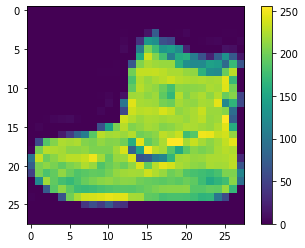

In [9]:
#데이터 전처리
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# 값의 범위를 0~1 사이로 조정
train_images = train_images/255.0
test_images = test_images/255.0

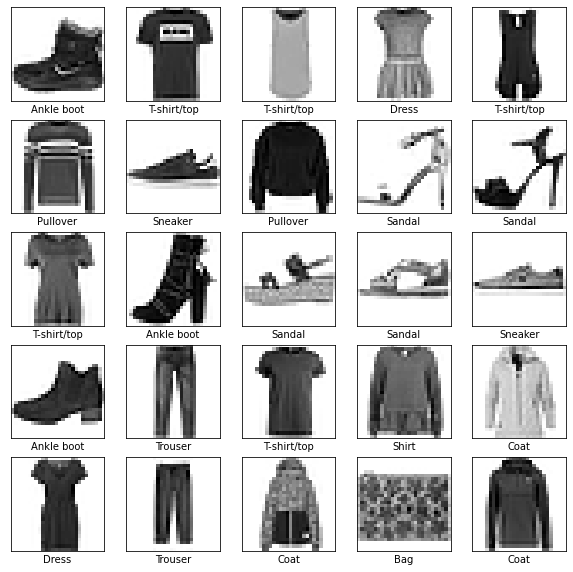

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
# 모델 구성
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)
])

In [14]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# 모델 훈련
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4980 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3729 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3366 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3123 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2935 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2786 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2697 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2558 - accuracy: 0.9057
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2484 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

In [16]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3480 - accuracy: 0.8822 - 654ms/epoch - 2ms/step

Test accuracy: 0.8822000026702881


In [19]:
# 예측하기
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)

In [21]:
predictions[0]

array([5.0033555e-06, 8.0348678e-07, 1.5256257e-08, 1.4477321e-08,
       1.2856984e-06, 1.9830471e-04, 7.7940250e-08, 6.0593333e-02,
       8.8859036e-09, 9.3920124e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0] # 정답 확인

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color='blue'
  else:
    color= 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)

In [25]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot=plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

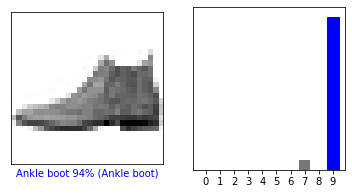

In [28]:
#예측확인
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

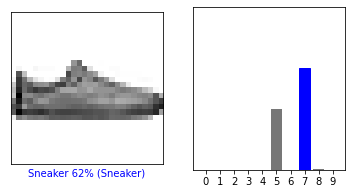

In [29]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

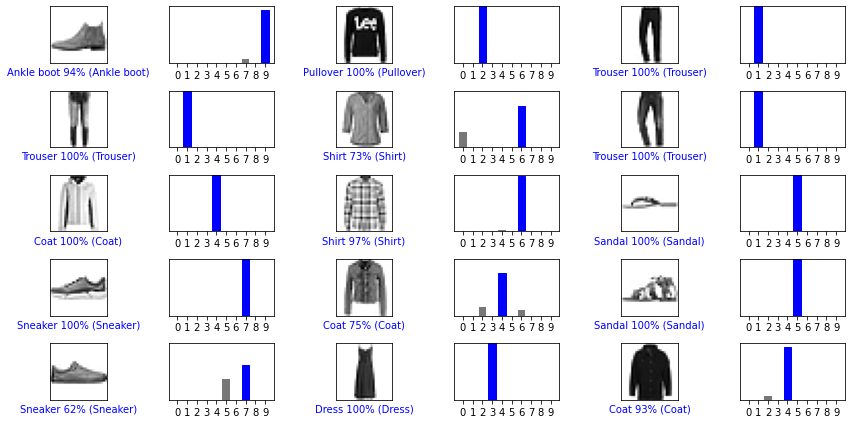

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_cols))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [31]:
# 훈련된 모델 사용하기
img = test_images[1]
print(img.shape)

(28, 28)


In [32]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [33]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.6131076e-04 7.5723473e-12 9.9887127e-01 2.5978289e-10 5.3062226e-04
  1.0909574e-10 4.3672818e-04 1.6757373e-13 4.1272155e-10 1.6742097e-10]]


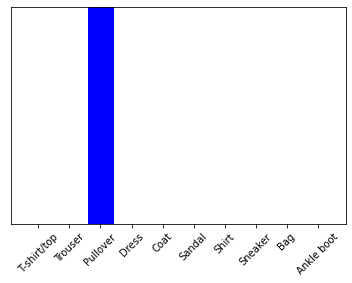

In [35]:
plot_value_array(1, predictions_single[0], test_labels)
_=plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [36]:
np.argmax(predictions_single[0])

2